# diabetes

In [48]:
import numpy as np
import pandas as pd

df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [50]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## preprocessing

In [51]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [52]:
x = np.array(x)
y = np.array(y)

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [55]:
x_train.shape, y_train.shape

((614, 8), (614,))

## preformance metrics

In [56]:
from sklearn.metrics import precision_score, recall_score, accuracy_score


def cmet(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true= y_train, y_pred= y_pred_train)
    acc_test = accuracy_score(y_true= y_test, y_pred= y_pred_test)

    r = recall_score(y_true= y_test, y_pred= y_pred_test, average='weighted')

    p = precision_score(y_true= y_test, y_pred= y_pred_test, average='weighted')

    print(f'acc train = {acc_train * 100}, acc test = {acc_test * 100}, precision = {p * 100}, recall = {r * 100}')
    return acc_test, acc_train, r, p


# 1.naive base

In [57]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [75]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = cmet(y_train,y_test, y_pred_train, y_pred_test)

acc train = 74.9185667752443, acc test = 76.62337662337663, precision = 76.07530084594305, recall = 76.62337662337663


# 2.knn

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [60]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = cmet(y_train,y_test, y_pred_train, y_pred_test)

acc train = 78.50162866449512, acc test = 71.42857142857143, precision = 69.81861114092519, recall = 71.42857142857143


# 3.decision tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8, min_samples_split=4, min_samples_leaf=2)
dt.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4)

In [62]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = cmet(y_train,y_test, y_pred_train, y_pred_test)

acc train = 91.69381107491856, acc test = 74.67532467532467, precision = 73.74174071542492, recall = 74.67532467532467


# 4.random forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [64]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = cmet(y_train,y_test, y_pred_train, y_pred_test)

acc train = 100.0, acc test = 78.57142857142857, precision = 77.99744897959184, recall = 78.57142857142857


# 5.svm

In [65]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [66]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = cmet(y_train,y_test, y_pred_train, y_pred_test)

acc train = 78.0130293159609, acc test = 79.22077922077922, precision = 78.7134604525909, recall = 79.22077922077922


# 6.logistic regresion

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [68]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = cmet(y_train,y_test, y_pred_train, y_pred_test)

acc train = 78.33876221498372, acc test = 79.22077922077922, precision = 78.7965787965788, recall = 79.22077922077922


# 7.ANN

In [69]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=64, max_iter=100)
ann.fit(x_train, y_train)

c:\Users\pooria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=64, max_iter=100)

In [70]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = cmet(y_train,y_test, y_pred_train, y_pred_test)

acc train = 79.31596091205212, acc test = 78.57142857142857, precision = 78.11743341404357, recall = 78.57142857142857


# comparison

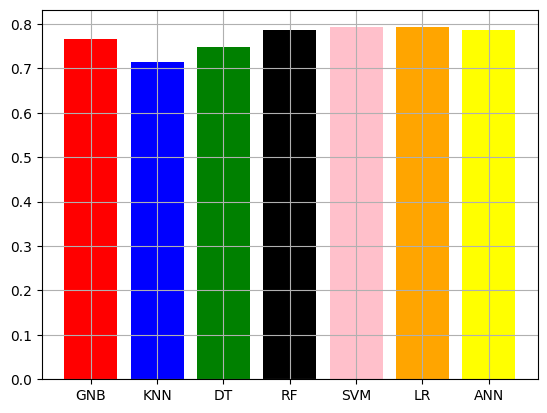

In [71]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow']
plt.bar(title, acc_train, color= colors)
plt.grid()
plt.show()

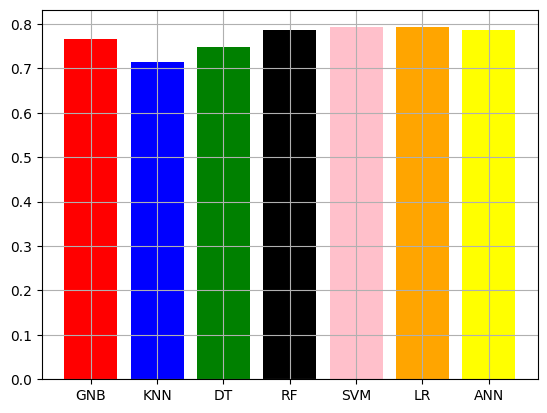

In [72]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow']
plt.bar(title, acc_train, color= colors)
plt.grid()
plt.show()

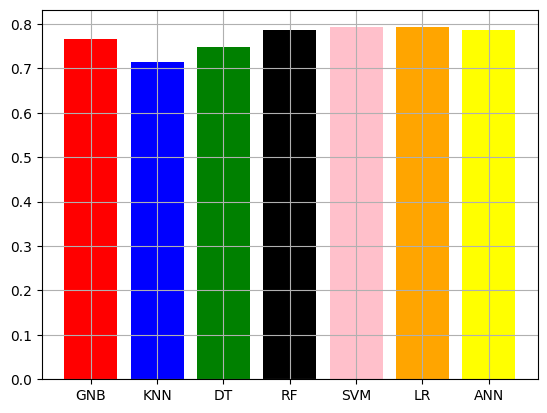

In [73]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow']
plt.bar(title, p, color= colors)
plt.grid()
plt.show()

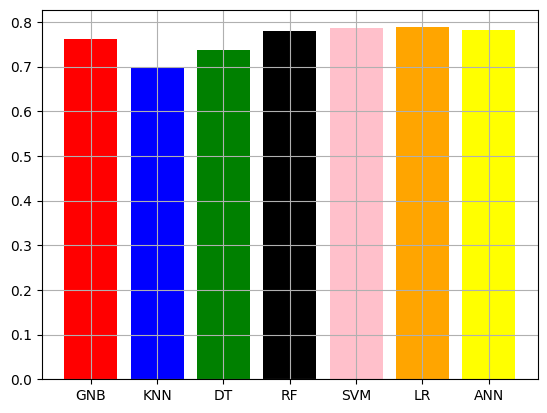

In [74]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow']
plt.bar(title, r, color= colors)
plt.grid()
plt.show()